## KMeans Clustering

### - To Explore Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

#### IMPORTING NECESSARY LIBRARIES

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

loading Iris Dataset

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names )
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


Creating variable X

In [25]:
X = iris.iloc[:,[0,1,2,3]].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

importing KMeans from sklearn.cluster

In [26]:
from sklearn.cluster import KMeans

finding n_clusters using wcss method

In [27]:
wcss = []  #wcss = within cluster sum of squares

for i in range(1,11):    #for each dataset i in range 1 to 11 that means here i am oly looking for 10 clusters
    
    kmean = KMeans(n_clusters = i, random_state = 0)
    
    kmean.fit(X)
    
    wcss.append(kmean.inertia_)    

Plotting the Elbow Curve

Text(0, 0.5, 'wcss')

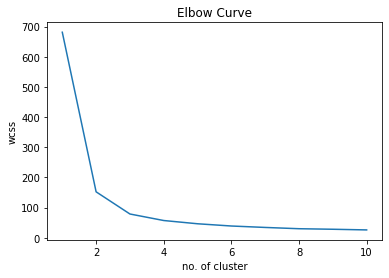

In [28]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Curve')
plt.xlabel('no. of cluster')
plt.ylabel('wcss')

we see elbow in the above curve at 2 and at 3

so we choose that elbow where the drop is not substantial or less considerable so that is 3, after 3 the drop become rather smooth drop

#### Now fit the model at n_clusters = 3

In [29]:
k_mean = KMeans(n_clusters = 3, random_state = 0)

y_kmean_clustering = k_mean.fit_predict(X)

In [30]:
y_kmean_clustering

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

VISUALIZING RESULTS

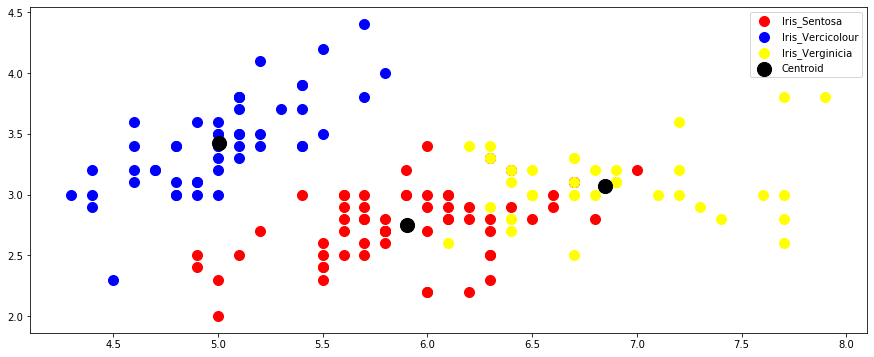

In [31]:
plt.figure(figsize=(15,6))
plt.scatter(X[y_kmean_clustering==0, 0], X[y_kmean_clustering==0, 1], s=100, c='red', label = 'Iris_Sentosa')
plt.scatter(X[y_kmean_clustering==1, 0], X[y_kmean_clustering==1, 1], s=100, c='blue', label = 'Iris_Vercicolour')
plt.scatter(X[y_kmean_clustering==2, 0], X[y_kmean_clustering==2, 1], s=100, c='yellow', label = 'Iris_Verginicia')
plt.scatter(k_mean.cluster_centers_[:,0], k_mean.cluster_centers_[:,1], s= 200, c = 'black', label = 'Centroid')
plt.legend()